In [1]:
# Importing all the required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Reading and displying the dataset
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Exploration

In [3]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Returns total sum of total null values in each column
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#  Returns total unique values in each column
for data in df.columns[:]:
    print(data,":",len(df[data].unique()),"labels")

age : 41 labels
sex : 2 labels
cp : 4 labels
trestbps : 49 labels
chol : 152 labels
fbs : 2 labels
restecg : 3 labels
thalach : 91 labels
exang : 2 labels
oldpeak : 40 labels
slope : 3 labels
ca : 5 labels
thal : 4 labels
target : 2 labels


In [6]:
# Returns statistics on numeric values of columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Data Visualization

## Count Plot of Target

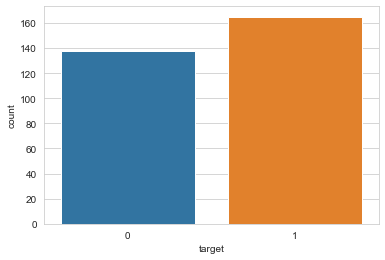

In [7]:
# Visualising the column 'Target' using Countplot
sns.set_style('whitegrid')
sns.countplot(df.target)
plt.show()

## Box Plot of Age

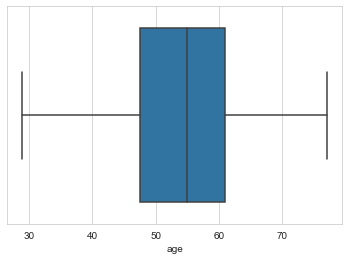

In [8]:
sns.boxplot(df.age)
plt.show()

## Count Plot of Age with Target variable

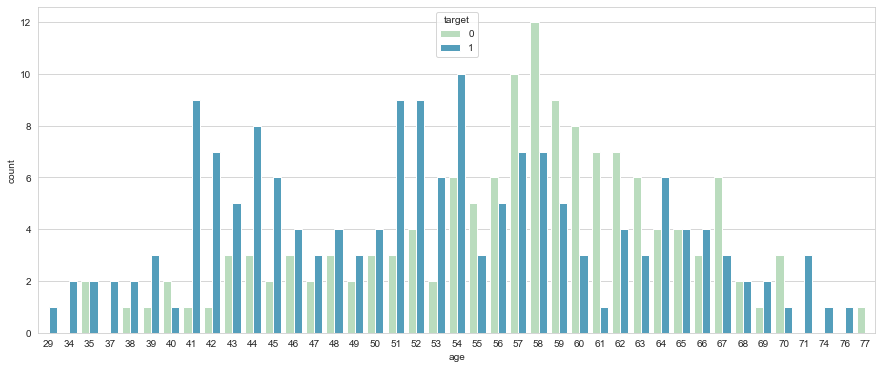

In [9]:
# Visualising the columns 'Age' using Countplot
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

## Bar Plot of Sex with Target variable

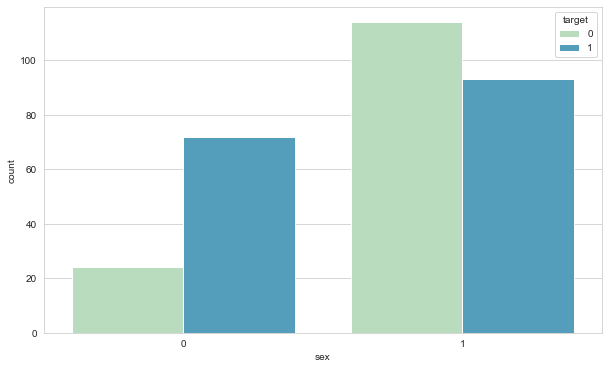

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='sex',data = df, hue = 'target',palette='GnBu')
plt.show()

Sex plot - Observation

From the Count plot we observed that the number of Female are more that the total number of Male.

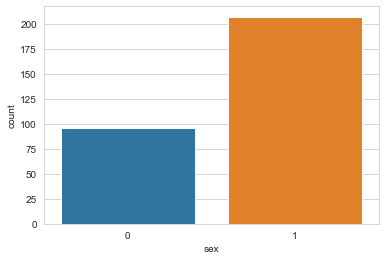

In [11]:
# Count plot of sex
sns.countplot(df.sex)
plt.show()

## Bar Plot of sex and Age comparing with cp(Chest Pain) 

In [12]:
# Converting to by add names to the values
df['cp'][df['cp'] == 0] = 'typical angina'
df['cp'][df['cp'] == 1] = 'atypical angina'
df['cp'][df['cp'] == 2] = 'non-anginal pain'
df['cp'][df['cp'] == 3] = 'asymptomatic'

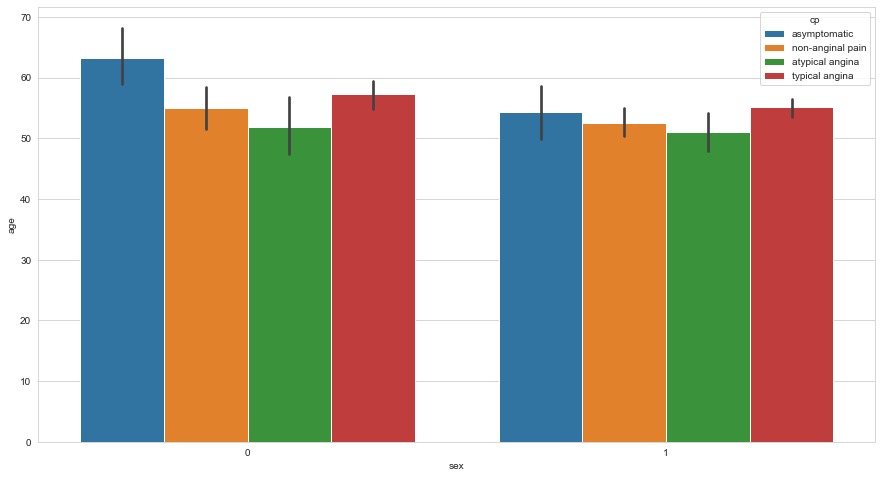

In [13]:
plt.figure(figsize=(15,8))
sns.barplot('sex','age',hue='cp',data=df)
plt.show()

In [14]:
# Converting to its original values
df['cp'][df['cp'] == 'typical angina'] = 0
df['cp'][df['cp'] ==  'atypical angina'] = 1
df['cp'][df['cp'] == 'non-anginal pain'] = 2
df['cp'][df['cp'] ==  'asymptomatic'] = 3

## Distribution Plot of all the attributes

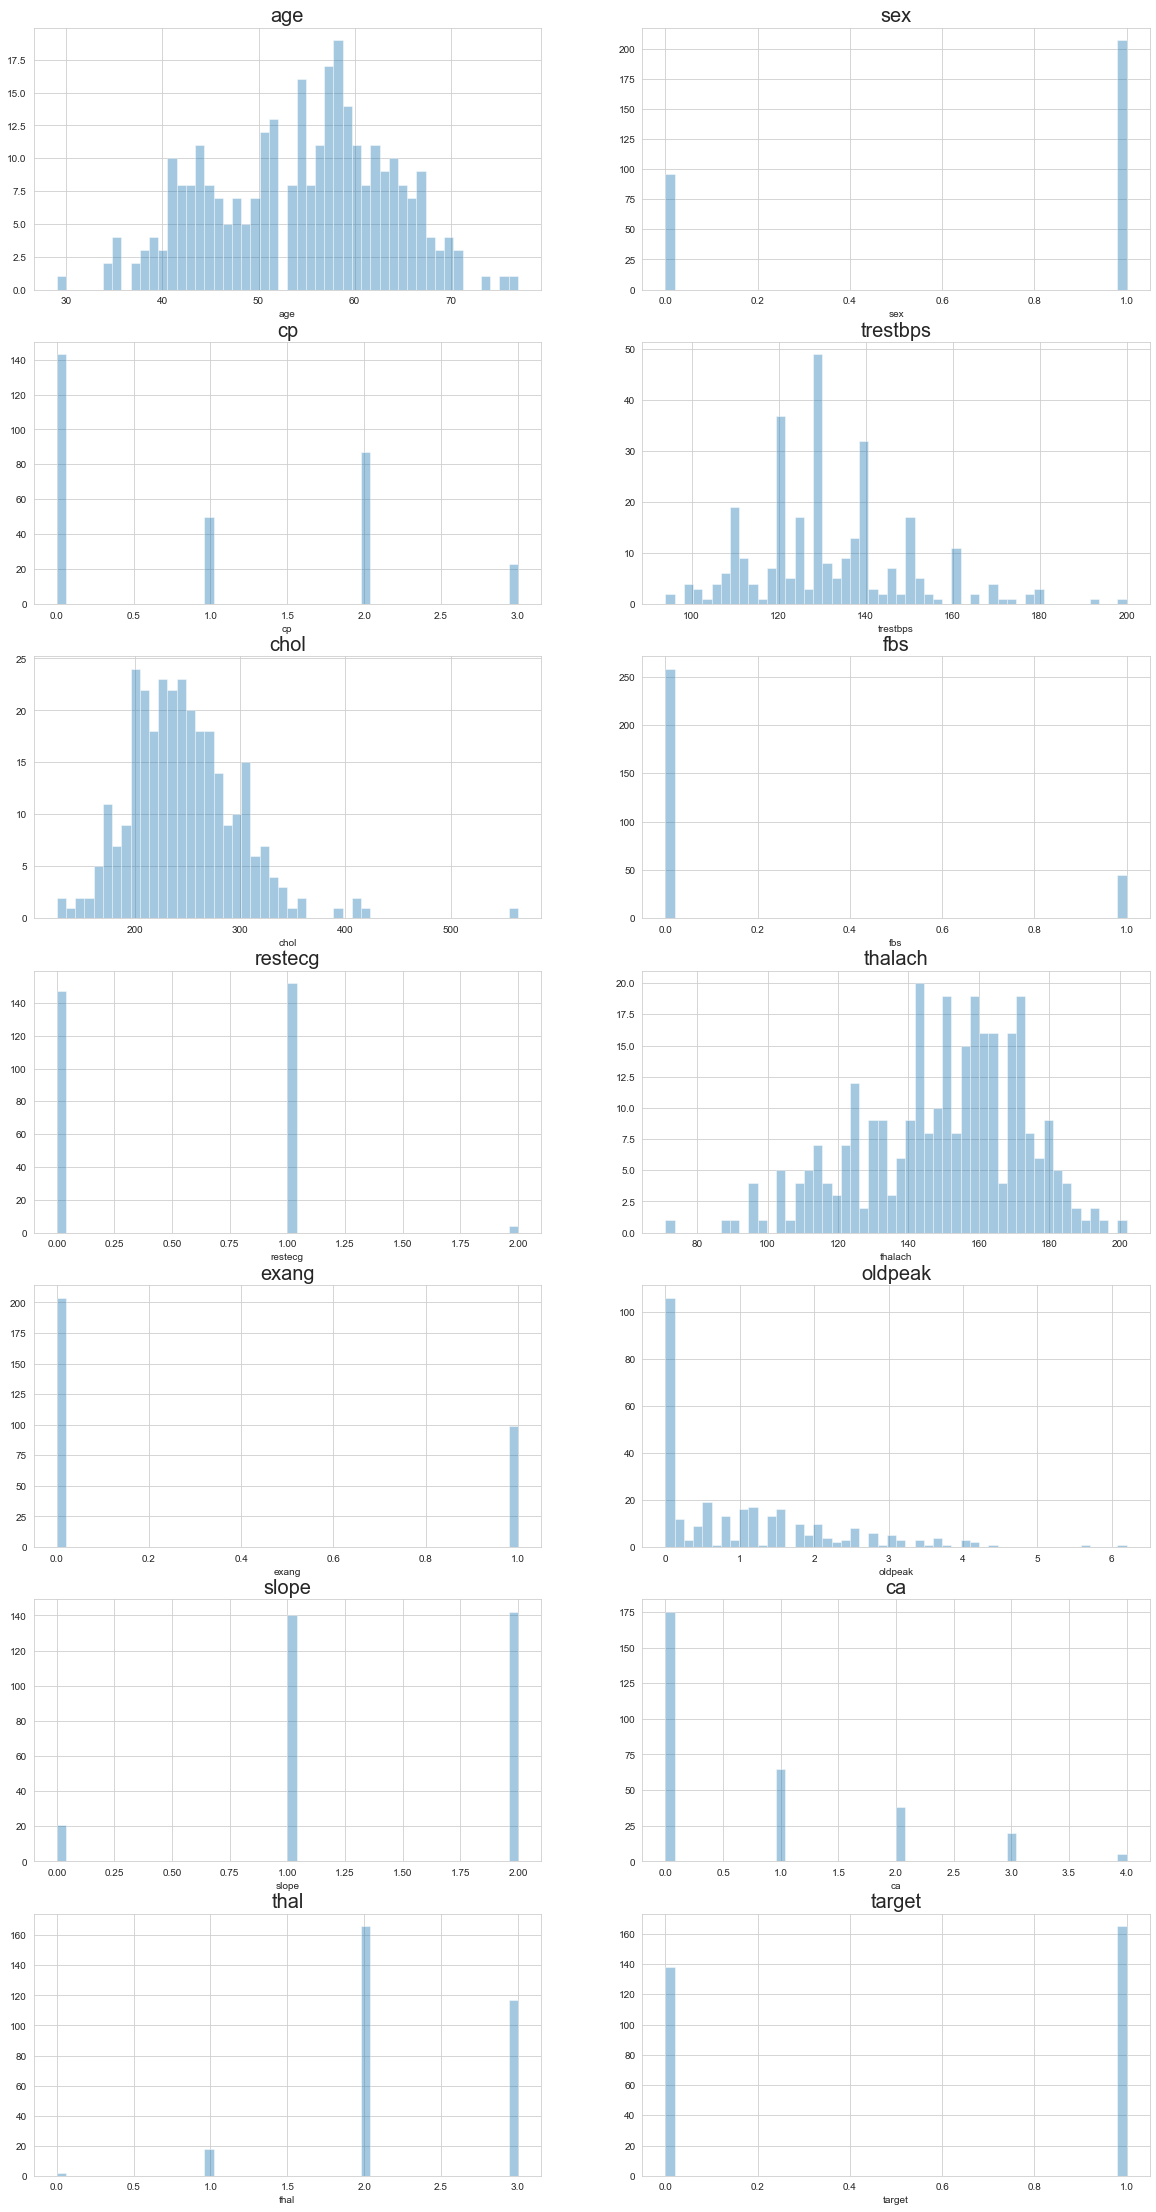

In [15]:
# Visualising the all the columns using histogram plot
nrows=len(df.columns)
ncolumns=2
subCnt=1
plt.figure(figsize=(20,80))
for i in df.columns[:]:
    plt.subplot(nrows,ncolumns,subCnt)
    plt.title(i, fontsize=20)
    sns.distplot(df[i],bins=50,kde=False)
    # plt.hist(df[i],bins=50)
    subCnt = subCnt + 1

plt.show()

## Box plot of all the attributes

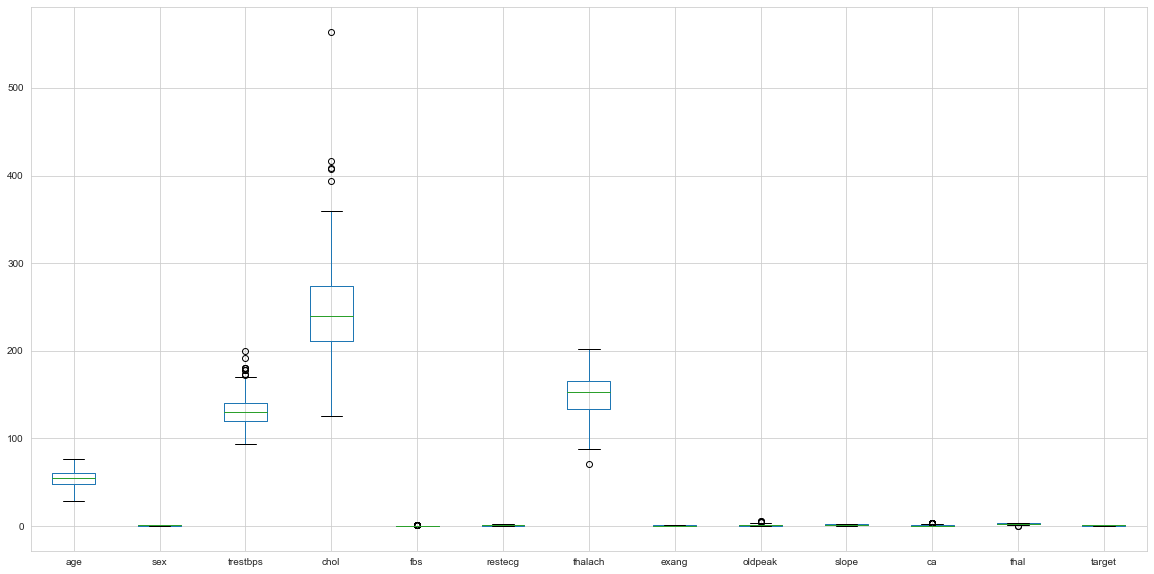

In [16]:
# Visualising the all the columns using Box plot
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

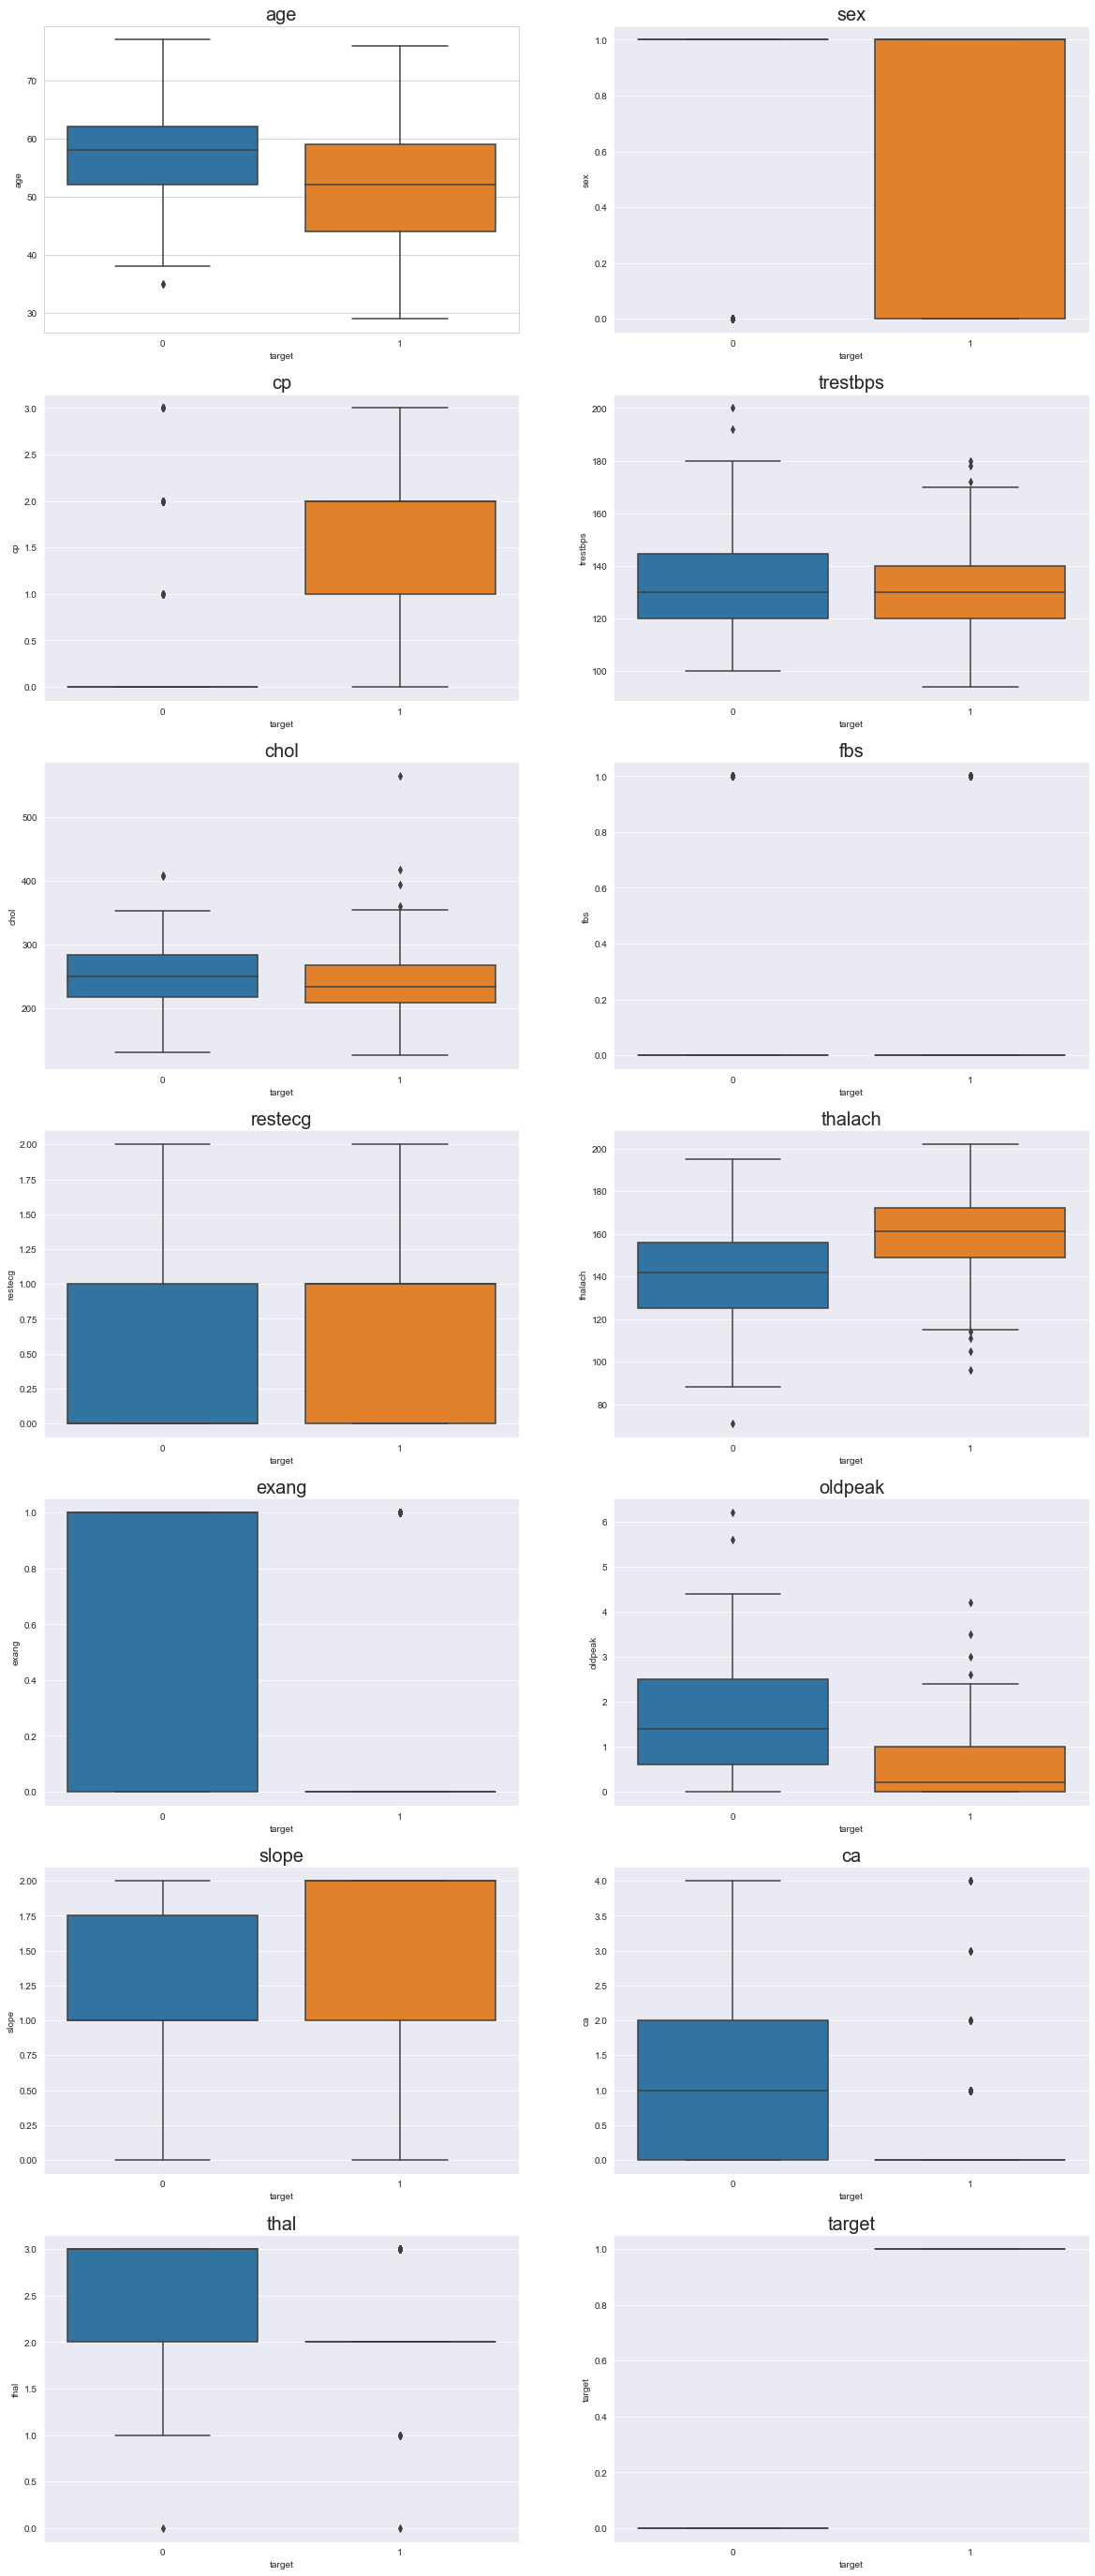

In [17]:
# Visualising the all the columns using Box plot
nrows=len(df.columns)
ncolumns=2
subCnt=1
plt.figure(figsize=(20,100))
for i in df.columns[:]:
    plt.subplot(nrows,ncolumns,subCnt)
    sns.set_style('darkgrid')
    plt.title(i, fontsize=20)
    sns.boxplot(x=df.target,y=df[i])
    subCnt = subCnt + 1

plt.show()

# Detecting Outliers

In [18]:
# Returns the lower and upper bound of the columns
def outlier(df,variable):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_bound=df[variable].quantile(0.25)-(IQR*1.5)
    upper_bound=df[variable].quantile(0.75)+(IQR*1.5)
    return lower_bound,upper_bound

def extrem_outlier(df,variable):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_bound=df[variable].quantile(0.25)-(IQR*3)
    upper_bound=df[variable].quantile(0.75)+(IQR*3)
    return lower_bound,upper_bound


In [19]:
outlier(df,'trestbps')

(90.0, 170.0)

In [20]:
extrem_outlier(df,'chol')

(20.5, 465.0)

In [21]:
outlier(df,'thalach')

(84.75, 214.75)

## Removing the Outliers 

In [22]:
data=df.copy()

In [23]:
# Removing the Outliers 
data.loc[data['trestbps']>=170.0,'trestbps']=170
data.loc[data['chol']>=465.0,'chol']=465
data.loc[data['thalach']<=84.75,'thalach']=84

In [24]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Correlation Matrix

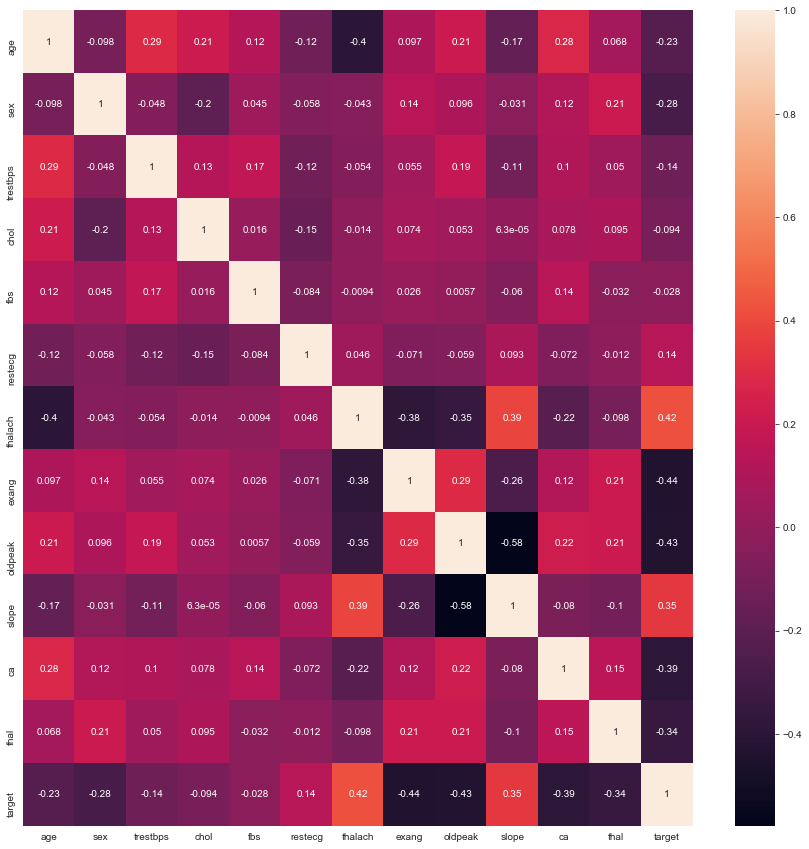

In [25]:
# Returns the correlation between all the attributes
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Data Preprocessing

In [26]:
# Selecting 'Target' as y and remaining all the features as X
X=data.drop(['target'],axis=1)
y=data['target']

Feature Scaling is performed and the model perfoms faster on scaling the values

# Spliting data into Train/Test 

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
print("Train dataset",X_train.shape,y_train.shape)
print("Test dataset",X_test.shape,y_test.shape)

Train dataset (242, 13) (242,)
Test dataset (61, 13) (61,)


In [28]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
8,52,1,2,170,199,1,1,162,0,0.5,2,0,3


In [29]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Defining Modal Confusion Metrix and Classification Report

In [30]:
# Returns the models confusion metrix and classification report

def plot_scores(name_of_model,X_test):
    # Predicting the model
    y_pred = name_of_model.predict(X_test)
    
    # Returns confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotting the confusion matrix
    plt.figure(figsize=(10,7))
    p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
    plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    
    print("\n")
    print("\t\t----------Classification report----------\n")
    # Returns Classification Report
    print(classification_report(y_test, y_pred))

# Model Building

## Finding optimal number of clusters using Elbow Method

In [31]:
# Calculating accuracy score values for 1 to 21 clusters
accuracy_score=[]
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X,y,cv=10)
    accuracy_score.append(score.mean())

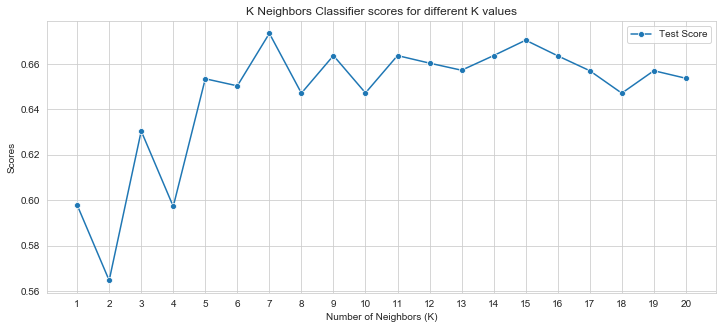

In [32]:
# Plotting the accuracy score values
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,21),accuracy_score,marker='o',label='Test Score')
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()


# KNN Model Building 

In [33]:
# Training the KNeighborsClassifier model with n_neighbors=13
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

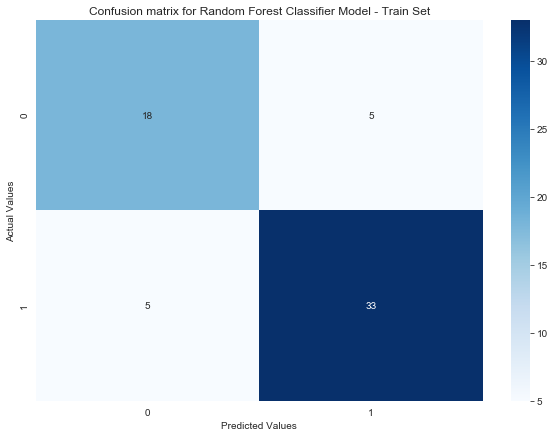



		----------Classification report----------

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.87      0.87      0.87        38

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [34]:
plot_scores(knn, X_test)

KNN Observation 

From the classification report the accuracy of KNN model is 0.72 wich shows the model performes well

# SVC Model Building

In [35]:
# Entering the parameters for hypertunning 
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C = [0.1,1,10,20,100]
parameters={
            'kernel': kernels,
            'C':C
            }

In [36]:
# Training the SVC model with RandomizedSearchCV and ploting the confusion matrix
svc=SVC()
svc_CV = RandomizedSearchCV(svc, param_distributions=parameters,cv=10,
                            n_iter=10,scoring='neg_mean_squared_error',random_state=5,n_jobs=1,verbose=False)
svc_CV.fit(X_train, y_train)

print(svc_CV.best_params_)

{'kernel': 'linear', 'C': 20}


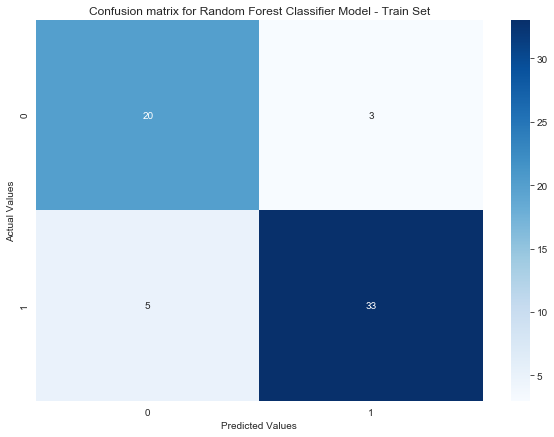



		----------Classification report----------

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        23
           1       0.92      0.87      0.89        38

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.86        61
weighted avg       0.87      0.87      0.87        61



In [37]:
plot_scores(svc_CV,X_test)

SVC Observation 

From the classification report the accuracy of SVC model is 0.87 which is also higher then the KNN model.

# RandomForest Model Building

In [38]:
# Entering the parameters for hypertunning 
param_grid = {'n_estimators': [int(x) for x in np.linspace(start=100,stop=1200,num=12)], 
              'min_samples_split': [2,5,10,15,20], 
              'min_samples_leaf': [1,2,5,10,12], 
              'max_features': ["auto","sqrt"],
              'max_depth': [int(x) for x in np.linspace(start=5,stop=30,num=3)], 
              'criterion': ['entropy','gini']}

In [39]:
# Training the RandomForestClassifier model with RandomizedSearchCV 
random_forest = RandomForestClassifier()

random_forest_CV = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid, cv=10,
                             n_iter=10,scoring='neg_mean_squared_error',random_state=5,n_jobs=1,verbose=False)

random_forest_CV.fit(X_train, y_train)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [40]:
# Returns the best estimator(parameters) of our model
random_forest_CV.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
# Training the RandomForestClassifier model with  best estimator values

rf_clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
# fitting the values in model
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

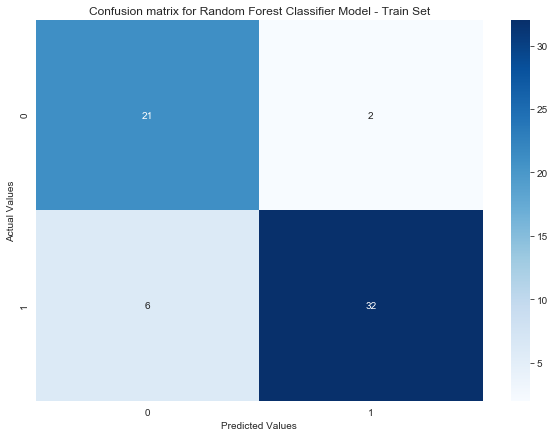



		----------Classification report----------

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        23
           1       0.94      0.84      0.89        38

    accuracy                           0.87        61
   macro avg       0.86      0.88      0.86        61
weighted avg       0.88      0.87      0.87        61



In [43]:
plot_scores(rf_clf,X_test)

RandomForest Observation

From the classification report the accuracy of RandomForest model is 0.85 which is same as SVC model.

# LogisticRegression Model Building

In [44]:
# Entering the parameters for hypertunning 
param_grid_log = {'penalty' : ['l1', 'l2'],
                  'C': [0.1,1.0,10,20,100],
                  'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                 }


In [45]:
# Training the LogisticRegression model with RandomizedSearchCV and ploting the confusion metrix

log_reg=LogisticRegression()
log_reg_CV = RandomizedSearchCV(estimator=log_reg, param_distributions=param_grid_log, cv=10,
                             n_iter=10,scoring='neg_mean_squared_error',random_state=5,n_jobs=1,verbose=False)

log_reg_CV.fit(X_train, y_train)

print(log_reg_CV.best_params_)

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}


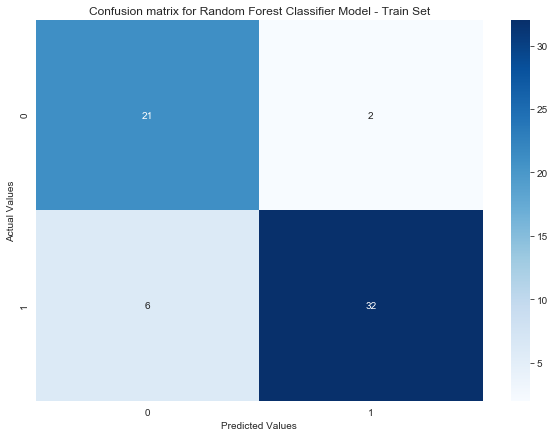



		----------Classification report----------

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        23
           1       0.94      0.84      0.89        38

    accuracy                           0.87        61
   macro avg       0.86      0.88      0.86        61
weighted avg       0.88      0.87      0.87        61



In [46]:
plot_scores(log_reg_CV,X_test)

LogisticRegression Observation

From the classification report the accuracy of LogisticRegression model is 0.87 which is same as SVC and Randomforest model.

# DecisionTree Model Building

In [47]:
# Entering the parameters for hypertunning 
param_grid = {'min_samples_split': [2,5,10,15,20,40, 50, 60, 70], 
              'min_samples_leaf': [1,2,5,10,12, 13, 14, 15, 16, 17], 
              'max_features': ["auto","sqrt"],
              'max_depth': [int(x) for x in np.linspace(start=5,stop=30,num=3)], 
              'criterion': ['entropy','gini']}

In [48]:
# Training the DecisionTreeClassifier model with RandomizedSearchCV and ploting the confusion metrix

dc_tree=DecisionTreeClassifier()
dtree_CV = RandomizedSearchCV(estimator=dc_tree, param_distributions=param_grid, cv=10,
                             n_iter=10,scoring='neg_mean_squared_error',random_state=5,n_jobs=1,verbose=False)
dtree_CV.fit(X_train, y_train)

print(dtree_CV.best_params_)

{'min_samples_split': 15, 'min_samples_leaf': 14, 'max_features': 'sqrt', 'max_depth': 17, 'criterion': 'gini'}


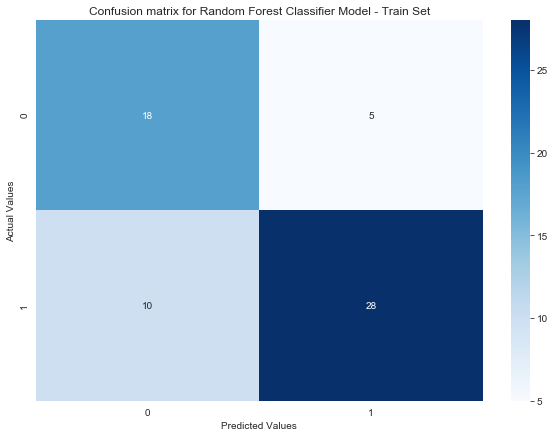



		----------Classification report----------

              precision    recall  f1-score   support

           0       0.64      0.78      0.71        23
           1       0.85      0.74      0.79        38

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.77      0.75      0.76        61



In [49]:
plot_scores(dtree_CV,X_test)

DecisionTree Observation

From the classification report the accuracy of DecisionTree model is 0.77.

# Overall Observation

From the classification report the accuracy of SVC,LinearRegression and RandomForest model are same.

## Since the Logistic Regression algorithm has the highest score in recall and f1-score, we will select Logistic Regression as our model.

In [50]:
log_reg=LogisticRegression(solver='lbfgs',penalty='l2',C=0.1)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.8688524590163934

## Predicting the model y using train values

In [51]:
def is_above_thrashold(value):
    THRESHOLD = 0.5
    return value > THRESHOLD

In [52]:
def make_decision(user_input):
    log_reg = LogisticRegression(solver='lbfgs',penalty='l2',C=0.1)
    log_reg.fit(X_train, y_train)
    prediction = log_reg.predict(user_input)
    
    if is_above_thrashold(prediction):
        print("You Can Suffer by Heart Disease,please visit Doctor as fast!")
    else:
        print("No need to worry, no symptoms of Disease!")

In [53]:
#Example 1
make_decision([[39,1,0,118,219,0,1,140,0,1.2,1,0,3]])

No need to worry, no symptoms of Disease!
